In [ ]:
from tgan.model import TGANModel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
returns_test = pd.read_csv('data/returns_test.csv', index_col=0)
returns_train = pd.read_csv('data/returns_train.csv', index_col=0)
returns_train.head()

,brent,crude,gasoline,heating,gas,natural
date,,,,,,
2008-01-02,-0.002453,-0.004417,-0.001007,-0.007773,0.006433,-0.022420
2008-01-03,-0.008299,-0.012805,-0.004679,-0.013093,-0.016270,0.021762
2008-01-04,-0.024796,-0.028802,-0.028853,-0.033538,-0.035440,0.004846
2008-01-07,0.012183,0.013040,0.012435,0.016503,0.027863,0.011169
2008-01-08,-0.012246,-0.006851,-0.015620,-0.008686,0.005958,0.016568


In [4]:
continuous_columns = [i for i in range(6)]
tgan = TGANModel(continuous_columns, restore_session=False)

In [ ]:
tgan.fit(returns_train)

In [13]:
tgan.save('tgan_model/tgan_model.pkl')

[0622 22:03:47 @model.py:813] Model saved successfully.


In [14]:
tgan.load('tgan_model/tgan_model.pkl')

[0622 22:04:25 @collection.py:146] New collections created in tower : tf.GraphKeys.REGULARIZATION_LOSSES
[0622 22:04:25 @collection.py:165] These collections were modified but restored in : (tf.GraphKeys.SUMMARIES: 0->2)
[0622 22:04:25 @sessinit.py:87] WRN The following variables are in the checkpoint, but not found in the graph: global_step, optimize/beta1_power, optimize/beta2_power
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[0622 22:04:26 @sessinit.py:114] Restoring checkpoint from output/model/model-50000 ...
INFO:tensorflow:Restoring parameters from output/model/model-50000


In [20]:
gen_tgan = tgan.sample(10000)

 24%|##4       |49/200[00:01<00:03,46.77it/s]


In [21]:
returns_test['type'] = 'real'
gen_tgan['type'] = 'generated'

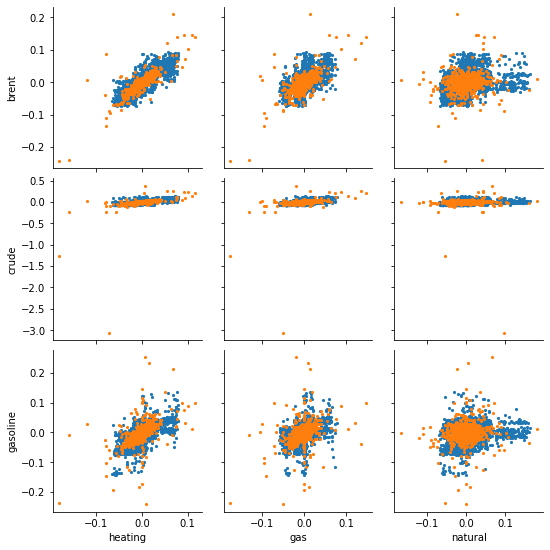

In [22]:
g = sns.pairplot(
    pd.concat([gen_tgan, returns_test]), 
    hue="type", 
    x_vars=["heating", "gas", 'natural'],
    y_vars=["brent", "crude", 'gasoline'],
    plot_kws=dict(s=10, linewidth=0)
)
g._legend.remove()
plt.show()

In [24]:
samples.to_csv('data/gen_tgan.csv')